# MNIST Classification Project

Using CNNs to Classify Handwritten Digits with Tensorflow and Keras

In [1]:
# Import necessary libraries
!pip install scikit-learn pandas seaborn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Use the MNIST handwriting dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
# Preprocess the data
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
X_train = X_train.reshape(
    X_train.shape[0], X_train.shape[1], X_train.shape[2], 1
)
X_test = X_test.reshape(
    X_test.shape[0], X_test.shape[1], X_test.shape[2], 1
)

In [4]:
# Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(28, 28, 1)
    ),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [5]:
# Train neural network
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.2695 - accuracy: 0.9188
Epoch 2/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.1145 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0914 - accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0774 - accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0683 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0609 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0491 - accuracy: 0.9845
Epoch 9/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 10/10
1875/1875 [==============================] 

In [6]:
# Evaluate neural network performance
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 13s - loss: 0.0469 - accuracy: 0.9861


[0.04689651355147362, 0.9861000180244446]

<AxesSubplot:>

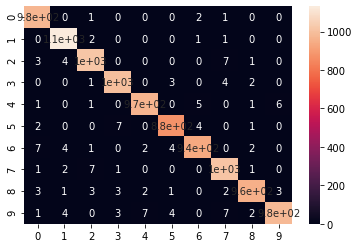

In [23]:
# Create a confusion matrix
y_pred = model.predict(X_test)
confusion_m = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(confusion_m, annot=True)